In [148]:
# importation des bibliothèques Python
%matplotlib inline
import pandas as pd
import numpy as np

In [149]:
# importation des datasets 
superficie = pd.read_csv("Datasets/superficie.csv", header=None)
nbre_sdb = pd.read_csv("Datasets/nombre_de_sdb.csv", header=None)
nbre_chambres = pd.read_csv("Datasets/nombre_de_chambres.csv", header=None)

In [150]:
superficie.head()

,0,1
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [151]:
nbre_sdb.head()

,0,1
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [152]:
nbre_chambres.head()

,0,1
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


In [153]:
# nommage des colonnes des datasets
superficie.columns = ['Id', 'superficie']
nbre_sdb.columns = ['Id', 'nbre_sdb']
nbre_chambres.columns = ['Id', 'nbre_chambres']

In [154]:
superficie.head()

,Id,superficie
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [155]:
nbre_sdb.head()

,Id,nbre_sdb
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [156]:
nbre_chambres.head()

,Id,nbre_chambres
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


In [157]:
#suppression de la colonne Id
superficie = superficie.drop('Id',1)
nbre_sdb = nbre_sdb.drop('Id',1)
nbre_chambres = nbre_chambres.drop('Id',1)

In [158]:
superficie.head(3)

,superficie
0,28844
1,27667
2,14742


In [159]:
nbre_sdb.head()

,nbre_sdb
0,2
1,1
2,1
3,3
4,1


In [160]:
nbre_chambres.head()

,nbre_chambres
0,1
1,4
2,1
3,4
4,2


In [161]:
# fusion des trois datasets en un seul que l'on nommera dataset
dataset = pd.concat([superficie, nbre_sdb, nbre_chambres], axis = 1)

In [162]:
dataset.head()

,superficie,nbre_sdb,nbre_chambres
0,28844,2,1
1,27667,1,4
2,14742,1,1
3,28089,3,4
4,11713,1,2


In [163]:
# superficie moyenne des maisons de notre dataset
surf_moy = dataset['superficie'].mean()

In [164]:
'la superficie moyenne des maisons de notre dataset est de : {}'.format(surf_moy)

'la superficie moyenne des maisons de notre dataset est de : 20439.77'

In [165]:
# nombre de chambres médian et moyen
chamb_moy = dataset['nbre_chambres'].mean()
chamb_median = dataset['nbre_chambres'].median()

In [166]:
'Pour la variable chambres, la moyenne est {} et la médiane est {}'.format(chamb_moy, chamb_median)

'Pour la variable chambres, la moyenne est 2.42 et la médiane est 2.0'

In [167]:
# importation de house_price.csv dans une variable nommée house_price
house_price = pd.read_csv("Datasets/house_price.csv")

In [168]:
house_price.head()

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


In [169]:
# création d'un id pour dataset égal à l'index de dataset
dataset['id'] = dataset.index

In [170]:
dataset.head()

,superficie,nbre_sdb,nbre_chambres,id
0,28844,2,1,0
1,27667,1,4,1
2,14742,1,1,2
3,28089,3,4,3
4,11713,1,2,4


In [171]:
# fusion de house_price et dataset
dataset = pd.merge(dataset, house_price, left_on='id', right_on='id', how='inner')

In [172]:
dataset.head()

,superficie,nbre_sdb,nbre_chambres,id,Unnamed: 0,house_price
0,28844,2,1,0,32,1421908.0
1,27667,1,4,1,71,1305091.0
2,14742,1,1,2,65,164373.0
3,28089,3,4,3,88,1441714.0
4,11713,1,2,4,49,108290.0


In [173]:
# coût moyen par maison
cout_moyen_maison = dataset['house_price'].sum()

In [174]:
"le coût moyen d'une maison est de : {}".format(cout_moyen_maison)

"le coût moyen d'une maison est de : 76774787.0"

In [175]:
# coût moyen par chambre
cout_moyen_chambre = dataset['house_price'].sum()/dataset['nbre_chambres'].sum()

In [176]:
"le coût moyen d'une chambre est de : {}".format(cout_moyen_chambre)

"le coût moyen d'une chambre est de : 317251.18595041323"

In [177]:
# création d'une nouvelle colonne nommée taille_maison
dataset['taille_maison']='' 

In [178]:
dataset.head()

,superficie,nbre_sdb,nbre_chambres,id,Unnamed: 0,house_price,taille_maison
0,28844,2,1,0,32,1421908.0,
1,27667,1,4,1,71,1305091.0,
2,14742,1,1,2,65,164373.0,
3,28089,3,4,3,88,1441714.0,
4,11713,1,2,4,49,108290.0,


In [179]:
# création de cinq catégories "très grande/"grande"/"moyenne"/"petite"/"très petite" pour la colonne 'taille_maison'       
for index, val in enumerate(dataset["superficie"]):
    if (val > 25000):
        dataset.at[index, "taille_maison"] = "très grande"
    elif (val <= 25000 and val > 20000):
        dataset.at[index, "taille_maison"] = "grande"
    elif (val <= 20000 and val > 15000):
        dataset.at[index, "taille_maison"] = "moyenne"
    elif (val <= 15000 and val > 10000):
        dataset.at[index, "taille_maison"] = "petite"
    else:
        dataset.at[index,"taille_maison"] = "très petite"

In [180]:
dataset.head()

,superficie,nbre_sdb,nbre_chambres,id,Unnamed: 0,house_price,taille_maison
0,28844,2,1,0,32,1421908.0,très grande
1,27667,1,4,1,71,1305091.0,très grande
2,14742,1,1,2,65,164373.0,petite
3,28089,3,4,3,88,1441714.0,très grande
4,11713,1,2,4,49,108290.0,petite


In [183]:
# coût moyen d'une maison en fonction de sa catégorie de superficie
dataset.groupby('taille_maison').mean()

,superficie,nbre_sdb,nbre_chambres,id,Unnamed: 0,house_price
taille_maison,,,,,,
grande,22282.913043,1.869565,2.260870,54.826087,55.434783,7.325385e+05
moyenne,17590.578947,1.894737,2.684211,54.000000,52.631579,3.256948e+05
petite,12163.961538,1.961538,2.461538,50.576923,48.769231,1.561387e+05
très grande,27530.812500,2.062500,2.343750,42.125000,43.968750,1.552456e+06


In [187]:
# graphique
import seaborn as sns

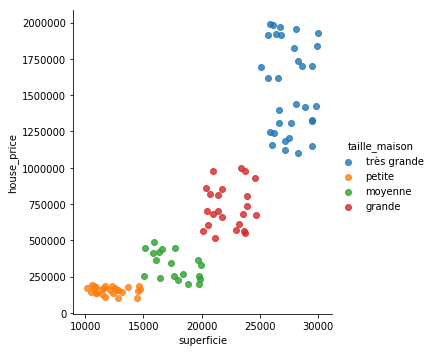

In [189]:
sns.lmplot(x ="superficie", y="house_price", data = dataset, fit_reg=False, hue='taille_maison')

In [ ]:
# plus la maison est grande, plus le prix augmente